In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_test.shape

(10000,)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

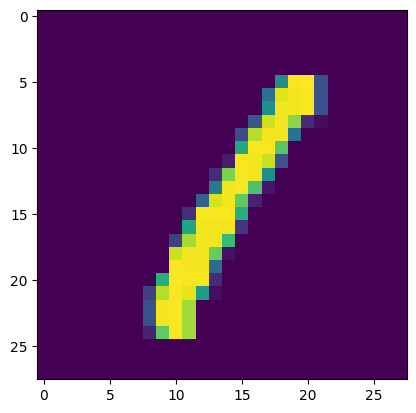

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])


In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 13s 6ms/step - loss: 0.2801 - accuracy: 0.9184 - val_loss: 0.1605 - val_accuracy: 0.9523
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1182 - accuracy: 0.9648 - val_loss: 0.1228 - val_accuracy: 0.9645
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.1012 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0623 - accuracy: 0.9803 - val_loss: 0.1062 - val_accuracy: 0.9693
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0928 - val_accuracy: 0.9741
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.1191 - val_accuracy: 0.9666
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.1015 - val_accurac

In [12]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)


313/313 [==============================] - 1s 2ms/step


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9739

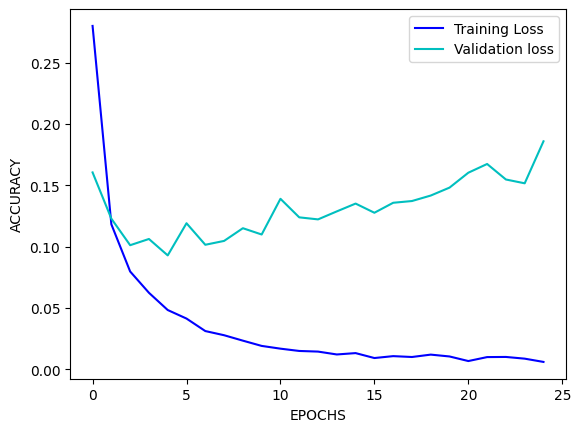

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='c', label='Validation loss')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()
plt.show()


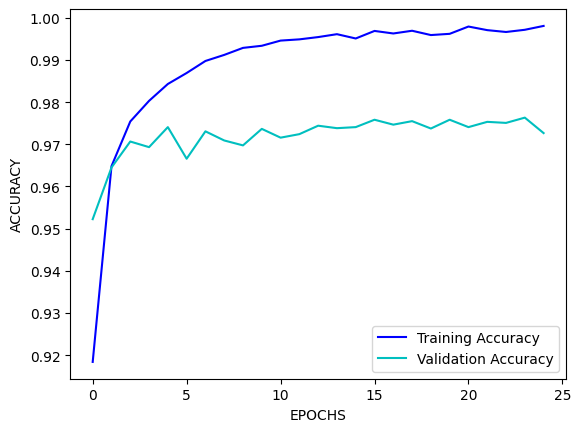

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='c', label='Validation Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()
plt.show()


313/313 [==============================] - 1s 2ms/step


array([[2.7490878e-14, 4.4286601e-17, 6.8998722e-16, ..., 1.0000000e+00,
        5.6389088e-15, 3.0734332e-11],
       [4.2363938e-26, 4.9554494e-09, 1.0000000e+00, ..., 2.3119370e-29,
        7.8175707e-22, 1.0127168e-33],
       [5.5827776e-13, 9.9999702e-01, 2.8558143e-08, ..., 5.9061712e-08,
        2.9127989e-06, 3.3287444e-12],
       ...,
       [5.8494390e-23, 5.9568560e-21, 5.2063630e-26, ..., 3.6931072e-24,
        4.1331134e-19, 4.5162259e-12],
       [1.1508994e-17, 9.9618427e-17, 1.8871038e-24, ..., 2.4506963e-18,
        6.8906139e-08, 1.9427523e-20],
       [3.5771892e-24, 2.0408735e-32, 6.6373881e-24, ..., 1.1756725e-34,
        3.3110989e-24, 9.0657986e-24]], dtype=float32)

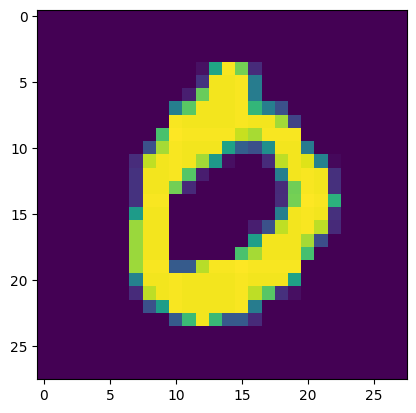

In [16]:
plt.imshow(x_test[3])
model.predict(x_test)